# Gambler’s Problem 
Example 4.3 of the book

https://medium.com/@jaems33/gamblers-problem-b4e91040e58a

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
S = np.arange(1,100)  # different states

In [157]:
def get_available_actions(s):
    top = min(s, 100-s)
    return np.arange(1, top+1)

In [158]:
pi = [None] # 0th state is terminal and not part of S
for i in range(1, 100):
    A = get_available_actions(i)
    pi.append(np.ones(len(A))/len(A))

In [159]:
def value_iteration(gamma, theta):
    V = np.zeros(len(S)+2)
    while True:
        delta = 0
        for s in S:
            v = V[s]
            A = get_available_actions(s)
            bellman_optimality_update(A, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    for s in S:
        A = get_available_actions(s)
        q_greedify_policy(A, V, pi, s, gamma)
    return V[:-1], pi

In [160]:
def bellman_optimality_update(A, V, s, gamma):
    a = np.zeros(len(A))
    for i, action in enumerate(A):
        t = 0
        trans = transitions(s, action)
        for (s_, r, p) in trans:
            t += p*(r + gamma*V[s_])        
        a[i] = t
    V[s] = np.max(a)

In [161]:
def q_greedify_policy(A, V, pi, s, gamma):
    a = np.zeros(len(A))
    for i, action in enumerate(A):
        t = 0
        trans = transitions(s, action)
        for (s_, r, p) in trans:
            t += p*(r + gamma*V[s_])
        a[i] = t
    j = np.argmax(a)
    a = np.zeros(len(A))
    a[j] = 1
    pi[s] = a

In [162]:
def transitions(s, action):
    s_1 = s + action
    s_2 = s - action
    r_1 = 1 if s_1 == 100 else 0
    r_2 = 0
    p_1 = p
    p_2 = 1 - p
    return [(s_1, r_1, p_1), (s_2, r_2, p_2)]

In [184]:
p = 0.41 # probability of heads
V_opt, pi_opt = value_iteration(1, 0.000000001)

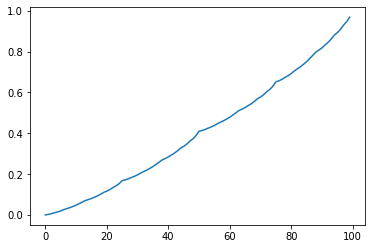

In [185]:
plt.plot(V_opt)

<BarContainer object of 100 artists>

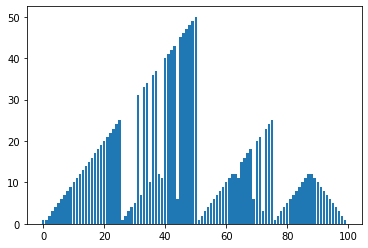

In [186]:
# plt.figure(figsize=(14,10))
plt.bar(np.arange(100), [np.argmax(p)+1 for p in pi_opt])

In [177]:
pi_opt

[None,
 array([1.]),
 array([1., 0.]),
 array([1., 0., 0.]),
 array([1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([1., 0., 0., 0., 0.,



This is how someone else solved it:
https://github.com/prateekbhat91/Gambler-Problem-RL/blob/master/gamblerproblem.py

In [122]:
"Discount factor"
gamma = 1
"Probability of occurence of Head"
probhead = 0.25
"The number of states availabe"
numStates = 100
"List for storing the reward value"
reward = [0 for _ in range(101)]
reward[100]=1
"Small threshold value for comparing the difference"
theta = 0.00000001
"List to store the value function for all states form 1 to 99"
value=[0 for _ in range(101)]
"List to store the amount of bet that gives the max reward"
policy = [0 for _ in range(101)]

def gambler():
    delta = 1

    while delta > theta:
        delta = 0
        "Looping over all the states i.e the money in hand for a current episode"
        for i in range(1,numStates):
            oldvalue = value[i]
            bellmanequation(i)
            diff = abs(oldvalue-value[i])
            delta = max(delta,diff)
    print(value)

    # plot()
    plt.plot(policy)
    plt.show()
def bellmanequation(num):
    "Initialize optimal value to be zero"
    optimalvalue = 0

    "The range of number of bets"
    for bet in range(0,min(num,100-num)+1):
        "Amount after winning and loosing"
        win = num + bet
        loss = num - bet
        "calculate the average of possible states for an action"
        "In this case it would be Head or Tails"
        sum = probhead * (reward[win] + gamma * value[win]) + (1 - probhead) * (reward[loss] + gamma * value[loss])

        "Choose the action that gives the max reward and update the policy and value for that"
        if sum > optimalvalue:
            optimalvalue = sum
            value[num] = sum
            policy[num] = bet


gambler()

[0, 7.286116436944212e-05, 0.0002914446574777685, 0.0006952645337037211, 0.001165778629911074, 0.00177125496560393, 0.0027810581348148844, 0.004036611890285258, 0.004663114519644296, 0.005601416143178994, 0.00708501986241572, 0.00904088721580365, 0.011124232581871951, 0.01567964587327708, 0.01614644840027779, 0.016953441224202948, 0.018652458917713943, 0.019826062107384246, 0.022405665411852738, 0.02738473440495781, 0.02834008091815221, 0.030494546580538184, 0.03616355080371836, 0.03849590993540364, 0.04449693245155273, 0.0625, 0.06271858349310833, 0.0633743339724333, 0.06458579360111116, 0.06599733588973322, 0.06781376489681179, 0.07084317443640396, 0.07460983630020834, 0.07648934418828546, 0.07930424905888955, 0.08375506068861416, 0.08962266310278877, 0.09587269933866455, 0.10953893761983124, 0.11093934520083337, 0.11336032367260884, 0.11845737722515626, 0.12197818679416716, 0.12971699732709158, 0.14465420321487343, 0.14752024275445663, 0.15398364009562537, 0.17099065241115508, 0.177

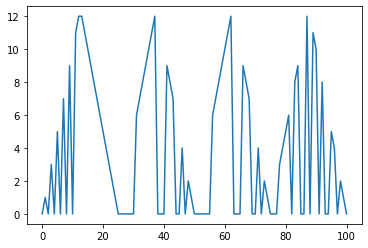

In [123]:
gambler()